# Podstawowe predykaty geometryczne, przeprowadzanie testów, wizualizacja i opracowanie wyników

In [2]:
import sys
sys.path.insert(0, '../..')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tests.test1 import Test
from visualizer.main import Visualizer

np.random.seed(42)

# Przydatne funkcje 

In [3]:
def draw_points(points):
    vis = Visualizer()
    vis.add_point(points, s=30, color='green')
    vis.show()

In [4]:
def draw_line(points_left, points_mid, points_right, title):
    vis = Visualizer()
    vis.add_line(((-1.0, 0.0), (1.0,0.1)), color='black')
    points_and_their_colors = [(len(points_left), points_left, 'green'),
                               (len(points_mid), points_mid, 'purple'),
                               (len(points_right), points_right, 'orange')]

    points_and_their_colors.sort(reverse=True, key=lambda x: x[0])
    for length, points, color in points_and_their_colors:
        vis.add_point(points, s=30, color=color)
    vis.add_title(title)

    vis.show()

In [5]:
def draw_example():
    vis = Visualizer()
    vis.add_line(((0, 2), (10, 7)), color='black')
    vis.add_point((4, 4), s=30, color='purple')
    vis.add_point((6, 6), s=30, color='green')
    vis.add_point((7, 4), s=30, color='orange')
    vis.show()

### Wprowadzenie
Celem ćwiczenia jest określenie po której stronie prostej znajduje się punkt.

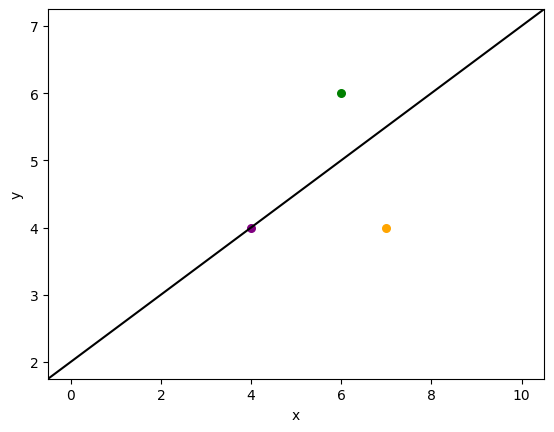

In [6]:
draw_example()

Do tego celu potrzebujesz wygenerować zbiory punktów testowych.


# Generowanie losowych punktów na płaszczyźnie

Uzupełnij funkcję ```generate_uniform_points```
 (Aby generować losowo liczby rzeczywiste bardzo przydatna może okazać się jakaś funckja biblioteczna)

In [7]:
def generate_uniform_points(left, right, n=10**5):
    """
    Funkcja generuje równomiernie n punktów na kwadwratowym obszarze od left do right (jednakowo na osi y) o współrzędnych rzeczywistych
    :param left: lewy kraniec przedziału
    :param right: prawy kraniec przedziału
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych np. [(x1, y1), (x2, y2), ... (xn, yn)]
    """
    points = np.random.uniform(left, right, size = (n, 2))
    points_list = [tuple(point) for point in points]

    return points_list

<span style="color:red">Ćw.</span> Wygeneruj $10^5$ losowych punktów w przestrzeni 2D o współrzędnych z przedziału $x, y \in \left[-1000,1000\right]^{2}$.

In [8]:
points_a = generate_uniform_points(-1000, 1000, 10 ** 5)

Zwizualizuj wygenerowane punkty

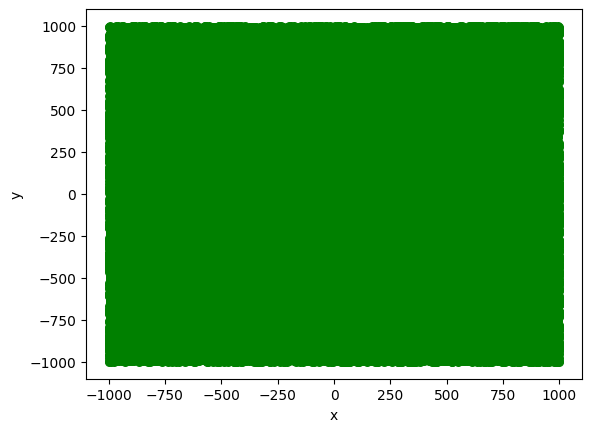

In [9]:
draw_points(points_a)

<span style="color:red">Ćw.</span> Wygeneruj $10^5$ losowych punktów w przestrzeni 2D o współrzędnych z przedziału $ x, y \in \left[-10^{14},10^{14}\right]^{2}$. Uzupełnij funkcję ```generate_big_num_of_points_2D```. Sprawdź, czy różni się wizualizalnie wynik tego ćwiczenia z poprzednim.

In [10]:
points_b = generate_uniform_points(-10 ** 14, 10 ** 14, 10 ** 5)

Zwizualizuj wygenerowane punkty.

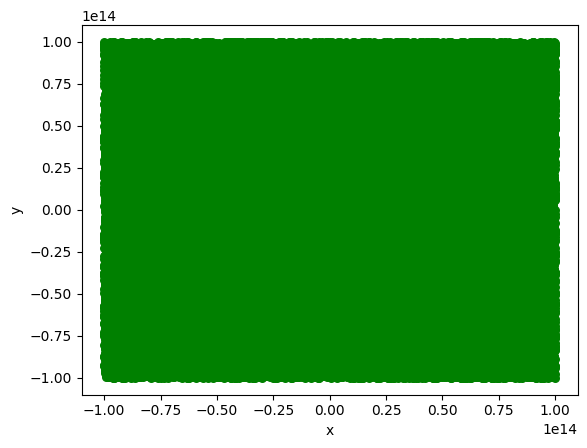

In [11]:
draw_points(points_b)

Uzupełnij funkcję ```generate_circle_points```

Zastanów się w sposób generować punkty jednostajnie na okręgu.

In [12]:
def generate_circle_points(O, R, n):
    ts = np.random.uniform(0, 1, size = n)
    points_list = []

    for t in ts:
        x = O[0] + R * np.cos((2 * np.pi) * t)
        y = O[1] + R * np.sin((2 * np.pi) * t)
        points_list.append((x, y))
    
    return points_list

<span style="color:red">Ćw.</span> Wygeneruj $ 1000$ losowych punktów w przestrzeni 2D leżących na okręgu o środku $ O = (0,0)$ i promieniu $ R = 100$. 

Uzupełnij funkcję ```generate_points_on_circle_2D```.

In [13]:
points_c = generate_circle_points((0, 0), 100, 1000)

Zwizualizuj wygenerowane punkty.

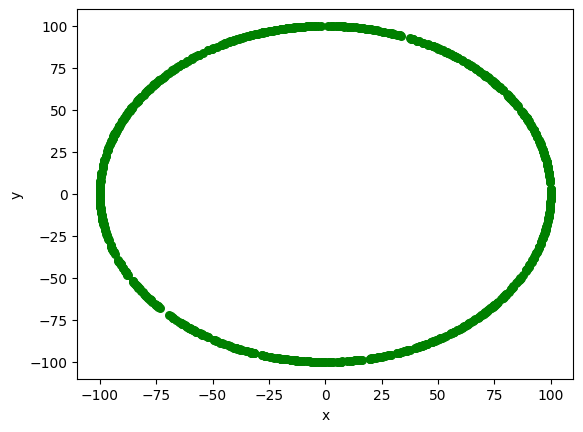

In [14]:
draw_points(points_c)

Uzupełnij funkcję ```generate_collinear_points```.

In [15]:
def generate_collinear_points(a, b, n, x_r=1000):
    point_list = []
    a_coefficient = (b[1] - a[1]) / (b[0] - a[0])
    b_coefficient = a[1] - a[0] * a_coefficient

    x_points = np.random.uniform(-x_r, x_r, n)
    for x_point in x_points:
        y_point = a_coefficient * x_point + b_coefficient
        point_list.append((x_point, y_point))
    
    return point_list

<span style="color:red">Ćw.</span>  Wygeneruj $ 1000$ losowych punktów w przestrzeni 2D o współrzędnej z przedziału $ x \in \langle -1000,1000 \rangle$ leżących na prostej wyznaczonej przez wektor $ \overrightarrow{ab}$. Przyjmij punkty $ a = (-1.0, 0.0)$ oraz $ b = (1.0, 0.1)$. Uzupełnij funkcję ```generate_points_on_line_2D```.

In [16]:
points_d = generate_collinear_points((-1.0, 0.0), (1.0,0.1), 1000)

Zwizualizuj wygenerowane punkty.

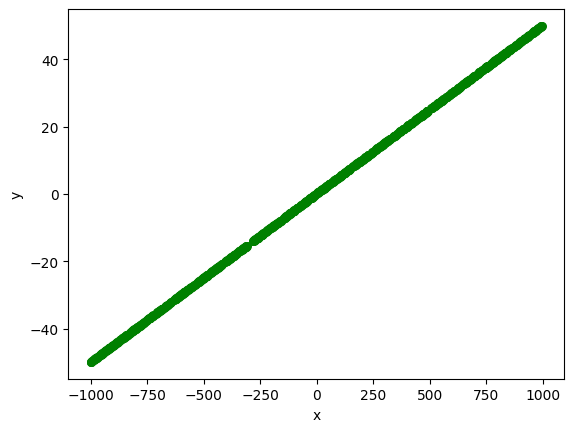

In [17]:
draw_points(points_d)

Przeprowadź test poprawności powyższych funkcji

In [18]:
Test().runtest(1, generate_uniform_points, generate_circle_points, generate_collinear_points)

Lab 1, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
Result: 4/4
Time: 0.219s


# Po której stornie prostej znajduje się punkt?

Prostym sposobem do obliczenia, po której strnie prostej znajduje się punkt jest obliczenie iloczynu wektorowego 
$\overrightarrow{ab} \times \overrightarrow{ac}$, gdzie $ c = (x,y)$ jest punktem, dla którego poszukujemy wiadomości o lokalizacji względem prostej przechodzącej przez punkty $ a$ i $ b$. Metoda ta jest równoznaczna z obliczeniem wyznacznika macierzy $ 2\times2$:  

$$
(1)\det(a, b, c)= \begin{vmatrix}
       a_{x} - c_{x} & a_{y} - c_{y} \\
       b_{x} - c_{x} & b_{y} - c_{y} 
              \end{vmatrix}
$$


lub wyznacznika macierzy $ 3\times3$:

$$
(2)\det(a, b, c)= \begin{vmatrix}
       a_{x} & a_{y} & 1 \\
       b_{x} & b_{y} & 1 \\
       c_{x} & c_{y} & 1
              \end{vmatrix}
$$

Upraszczając tą macierz przez odjęcie drugiego wiersza od trzeciego i odjęcie pierwszego wiersza od drugiego otrzymamy:

$$
\det(a, b, c)  = \begin{vmatrix}
              a_{x}         & a_{y}         & 1 \\
              b_{x} - a_{x} & b_{y} - a_{y} & 0 \\
              c_{x} - b_{x} & c_{y} - b_{y} & 0
                     \end{vmatrix}
              = (b_{x} - a_{x})(c_{y} - b_{y}) - (b_{y} - a_{y})(c_{x} - b_{x})
$$

Jest to wzór, z który opisuje pole równoległoboku mającego boki $ ab$ oraz $ ac$ (Dowód dlaczego tak jest, do zrobienia w domu)  
Dlaczego wiemy, że po obliczeniu wskaźnika podanego powyżej będziemy wiedzieć, po której stornie prostej znajduje się punkt?</font>
<font size="1">
</br>
***

**Dowód**:  

Załóżmy, że mamy dane trzy punkty w przestrzeni 2-wymiarowej $A, B$ oraz $C$. Znajdujemy prostą przechodzącą przez punkty $A$ i $B$. Następnie obliczamy $C_{y}$ przy danym $C_{x}$ i sprawdzamy czy punkt leży nad czy pod prostą.
Współczynnik nachylenia prostej jest nastepujący:

$$a = \frac{B_{y} - A_{y}}{B_{x} - A_{x}}
$$
Natomiast współczynnik $b$ wynosi:

$$b = B_{y} - \frac{(B_{y} - A_{y})B_{x}}{B_{x} - A_{x}}
$$

Po wpisaniu do równania $y = ax + b$ wyliczonego nachylenia prostej, współczynnika $b$ oraz zmiennej $C_{x}$ otrzymujemy:

$$y = \left(\frac{B_{y} - A_{y}}{B_{x} - A_{x}}\right)C_{x}+ \left(B_{y} - \frac{(B_{y} - A_{y})B_{x}}{B_{x} - A_{x}}\right)
$$

Otzymujemy punkt $C$ po lewej stronie prostej jeżeli $C_{y} - y > 0$, po prawej jeżeli $C_{y} - y < 0$, a punkt $C$ leżący na prostej, jeżeli $C_{y} - y = 0$. Przekształcimy powyższe równanie dla $C_{y} - y > 0$:

$$C_{y} - y > 0$$ 
$$C_{y} - \left(\frac{B_{y} - A_{y}}{B_{x} - A_{x}}\right)C_{x} - \left(B_{y} - \frac{(B_{y} - A_{y})B_{x}}{B_{x} - A_{x}}\right) > 0$$
$$C_{y}(B_{x} - A_{x}) - C_{x}(B_{y} - A_{y}) - B_{y}(B_{x} - A_{x}) + B_{x}(B_{y} - A_{y}) > 0$$
$$(C_{y} - B_{y})(B_{x} - A_{x}) + (B_{x} - C_{x})(B_{y} - A_{y}) > 0$$ 
$$(C_{y} - B_{y})(B_{x} - A_{x}) - (C_{x} - B_{x})(B_{y} - A_{y}) > 0$$

Zatem widzimy, że ostatnie równie jest takie same co przy równaniu wyznacznika macierzy $3\times3$. Niejawnie założyliśmy tutaj, że $B_{x}$ jest wieksze od $A_{x}$ , jeżeli byłoby odwrotnie zmieniłby się tylko znak nierówności na przeciwny. W naszym przypadku pokazaliśmy, że $C$ znajduje się po lewej stronie prostej jeżeli wyznacznik jest dodatni oraz po prawej stronie prostej, jeżeli wyznacznik jest ujemny. $Q.E.D$

---
Kolejnym zadaniem będzie zaimplementowanie własnych wyznaczników $(1)$ oraz $(2)$ i porówanie ich szybkości działania z wyznacznikami bibliotecznymi w testowaniu dla różnych zbiorów punktów. Co dodatkowo chcemy sprawdzić, czy wszystkie wyznaczniki podobnie kwalifikują podział względem danej lini.

Uzupełnij funkcje ```mat_det_3x3```

In [19]:
def mat_det_3x3(a, b, c, float32=False):
    return a[0]*b[1] + a[1]*c[0] + b[0]*c[1] - b[1]*c[0] - a[1]*b[0] - c[1]*a[0]

Uzupełnij funkcję ```mat_det_3x3_lib```, ale tym razem wykorzystaj dowolną funckję biblioteczną do obliczenia wyznacznika

In [20]:
def mat_det_3x3_lib(a, b, c, float32=False):
    """
    Obliczanie wyznacznika macierzy 3x3 z użyciem funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    if not float32:
        mat_3x3 = np.array([[a[0], a[1], 1],
                            [b[0], b[1], 1],
                            [c[0], c[1], 1]])
    else:
        a = np.float32(a)
        b = np.float32(b)
        mat_3x3 = np.array([[a[0], a[1], 1],
                            [b[0], b[1], 1],
                            [c[0], c[1], 1]], dtype=np.float32)
    
    return np.linalg.det(mat_3x3)

Uzupełnij funkcje ```mat_det_2x2```

In [21]:
def mat_det_2x2(a, b, c, float32=False):
    """
    Obliczanie wyznacznika macierzy 2x2 bez użycia funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    return (a[0] - c[0]) * (b[1] - c[1]) - (a[1] - c[1]) * (b[0] - c[0])

Uzupełnij funkcję ```mat_det_2x2_lib```, ale tym razem wykorzystaj dowolną funckję biblioteczną do obliczenia wyznacznika

In [22]:
def mat_det_2x2_lib(a, b, c, float32=False):
    """
    Obliczanie wyznacznika macierzy 2x2 z użyciem funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    if not float32:
        mat_2x2 = np.array([[a[0] - c[0], a[1] - c[1]], 
                            [b[0] - c[0], b[1] - c[1]]])
        
    else:
        a = np.float32(a)
        b = np.float32(b)
        mat_2x2 = np.array([[a[0] - c[0], a[1] - c[1]], 
                            [b[0] - c[0], b[1] - c[1]]], dtype=np.float32)

    return np.linalg.det(mat_2x2)


Przetestujmy napisane powyżej funkcje.

In [23]:
Test().runtest(2, mat_det_3x3, mat_det_2x2, mat_det_3x3_lib, mat_det_2x2_lib)

Lab 1, task 2:
	Test 1: Passed
	Test 2: Passed
Result: 2/2
Time: 0.000s


<span style="color:red">Ćw.</span> Klasyfikacja punktów względem prostej - zaimplementuj funkcję ```categorize_points```, która skwalifukuje punkty względem prostej wyznacznonej przez wektor $\large \overrightarrow{ab}$ (prosta przechodząca przez punkty $\large a$ oraz $\large b$.

In [24]:
def categorize_points(points, a, b, mat_det_func, eps, float32=False):
    """
    :param points: tablica punktów w postaci krotek współrzednych
    :param a: krotka współrzędnych oznaczająca początek odcinka
    :param b: krotka współrzędnych oznaczająca koniec odcinka
    :param mat_det_func: funkcja która będzie tutaj używana do obliczenia wyznacznika macierzy
    :param eps: epsilon - jak blisko wyznacznik macierzy ma być blisko zera, aby uznać punkt za leżący na prostej
    :return: 3 tablice zawierające kolejno zbiory punktów: leżące na lewo od prostej, leżące na prostej, leżące na prawo od prostek
    """
    left = []
    mid = []
    right = []
    
    for point in points:
        det = mat_det_func(a, b, point, float32)
        if abs(det) <= eps:
            mid.append(point)
        elif det < 0: 
            right.append(point)
        else:
            left.append(point)
    
    return (left, mid, right)


In [25]:
a = (-1.0, 0.0)
b = (1.0, 0.1)

Zwizualizuj sklasyfikowane punkty. Punkty różnią się kolorami ze względu na klasyfikację: na lewo od prostej - zielone, na prostej - fioletowe, na prawo - pomarańczowe.

A: eps=1e-12, mat_det_2x2, float64
a_eps_1e-12_mat_det_2x2_float64
points classified as left: 50187
points classified as mid: 0
points classified as right: 49813

A: eps=1e-12, mat_det_2x2_lib, float64
a_eps_1e-12_mat_det_2x2_lib_float64
points classified as left: 50187
points classified as mid: 0
points classified as right: 49813

A: eps=1e-12, mat_det_3x3, float64
a_eps_1e-12_mat_det_3x3_float64
points classified as left: 50187
points classified as mid: 0
points classified as right: 49813

A: eps=1e-12, mat_det_3x3_lib, float64
a_eps_1e-12_mat_det_3x3_lib_float64
points classified as left: 50187
points classified as mid: 0
points classified as right: 49813



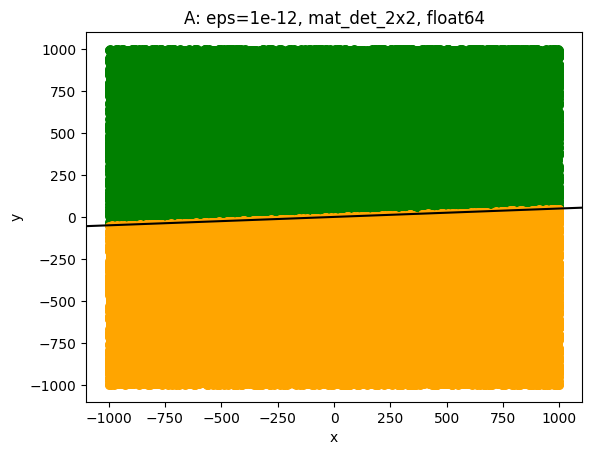

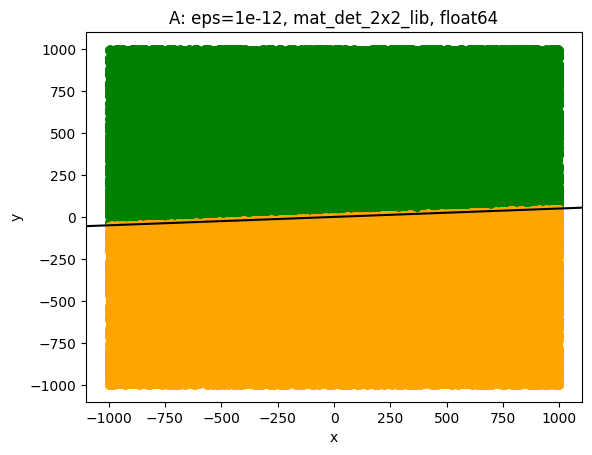

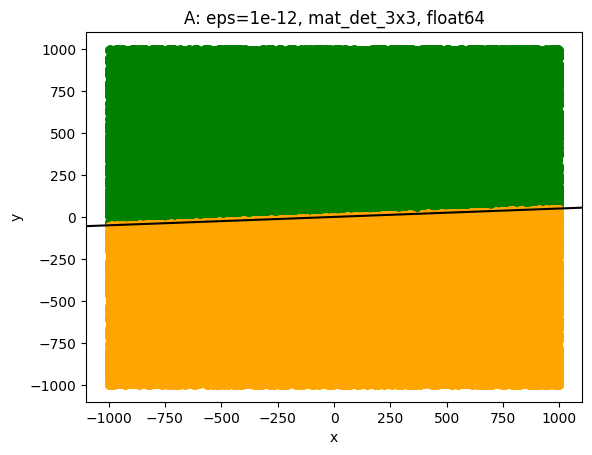

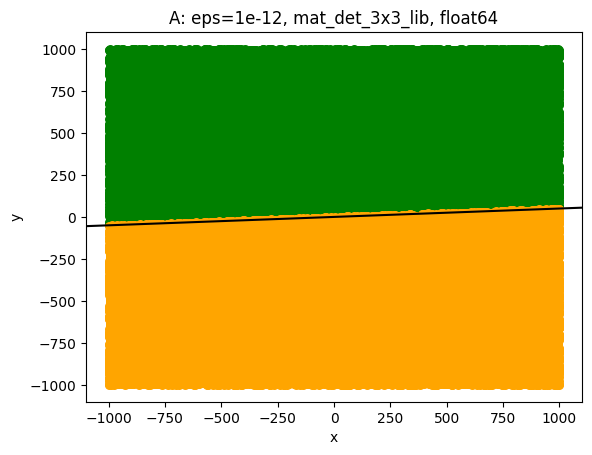

In [26]:
mat_det_functions = [mat_det_2x2, mat_det_2x2_lib, mat_det_3x3, mat_det_3x3_lib]
epsilon = 10 ** -12
points = points_a

for mat_det_function in mat_det_functions:
    classified_points = categorize_points(points, a, b, mat_det_function, epsilon)
    title = f"A: eps={str(epsilon)}, {mat_det_function.__name__}, float64"
    draw_line(classified_points[0], classified_points[1], classified_points[2], title)
    print(title)
    print(f"a_eps_{str(epsilon)}_{mat_det_function.__name__}_float64")
    print(f"points classified as left: {len(classified_points[0])}")
    print(f"points classified as mid: {len(classified_points[1])}")
    print(f"points classified as right: {len(classified_points[2])}")
    print()


B: eps=1e-12, mat_det_2x2, float64
b_eps_1e-12_mat_det_2x2_float64
points classified as left: 50106
points classified as mid: 9
points classified as right: 49885

B: eps=1e-12, mat_det_2x2_lib, float64
b_eps_1e-12_mat_det_2x2_lib_float64
points classified as left: 50109
points classified as mid: 6
points classified as right: 49885

B: eps=1e-12, mat_det_3x3, float64
b_eps_1e-12_mat_det_3x3_float64
points classified as left: 50110
points classified as mid: 0
points classified as right: 49890

B: eps=1e-12, mat_det_3x3_lib, float64
b_eps_1e-12_mat_det_3x3_lib_float64
points classified as left: 50110
points classified as mid: 0
points classified as right: 49890



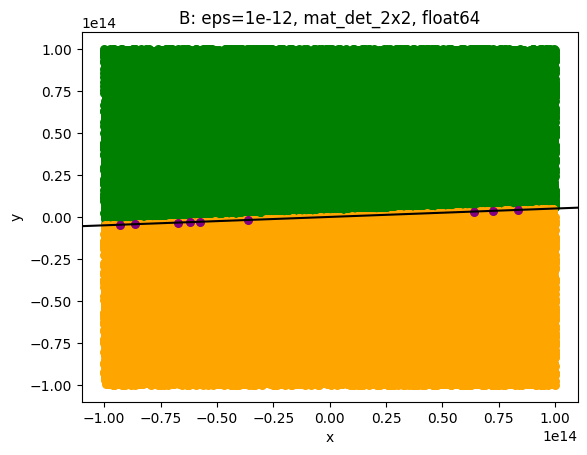

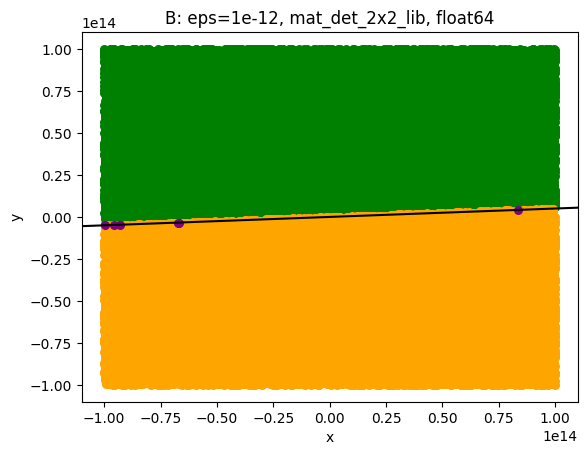

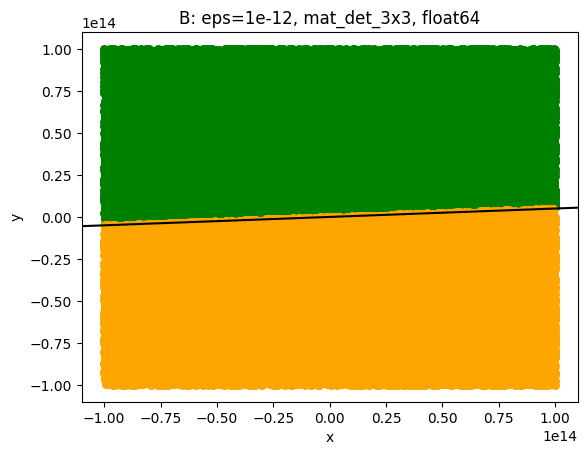

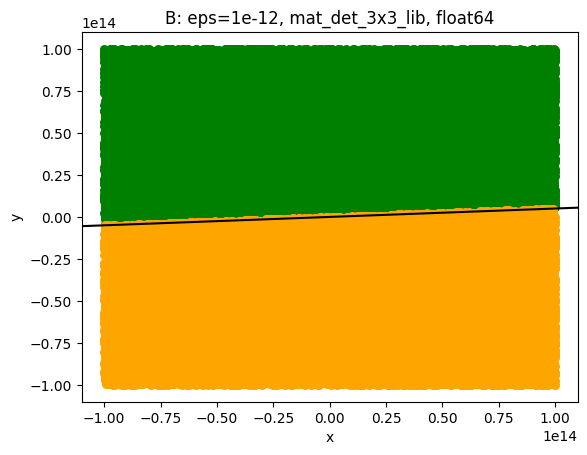

In [27]:
mat_det_functions = [mat_det_2x2, mat_det_2x2_lib, mat_det_3x3, mat_det_3x3_lib]
epsilon = 10 ** -12
points = points_b

for mat_det_function in mat_det_functions:
    classified_points = categorize_points(points, a, b, mat_det_function, epsilon)
    title = f"B: eps={str(epsilon)}, {mat_det_function.__name__}, float64"
    draw_line(classified_points[0], classified_points[1], classified_points[2], title)

    print(title)
    print(f"b_eps_{str(epsilon)}_{mat_det_function.__name__}_float64")
    print(f"points classified as left: {len(classified_points[0])}")
    print(f"points classified as mid: {len(classified_points[1])}")
    print(f"points classified as right: {len(classified_points[2])}")
    print()


C: eps=1e-12, mat_det_2x2, float64
c_eps_1e-12_mat_det_2x2_float64
points classified as left: 498
points classified as mid: 0
points classified as right: 502

C: eps=1e-12, mat_det_2x2_lib, float64
c_eps_1e-12_mat_det_2x2_lib_float64
points classified as left: 498
points classified as mid: 0
points classified as right: 502

C: eps=1e-12, mat_det_3x3, float64
c_eps_1e-12_mat_det_3x3_float64
points classified as left: 498
points classified as mid: 0
points classified as right: 502

C: eps=1e-12, mat_det_3x3_lib, float64
c_eps_1e-12_mat_det_3x3_lib_float64
points classified as left: 498
points classified as mid: 0
points classified as right: 502



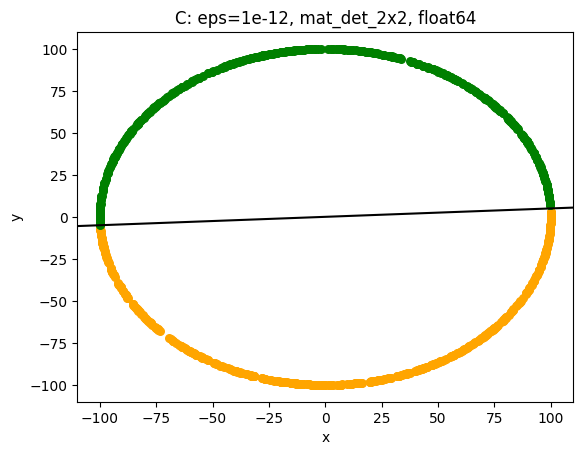

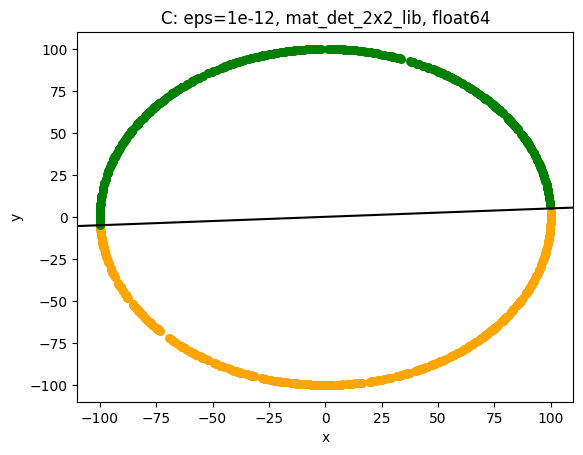

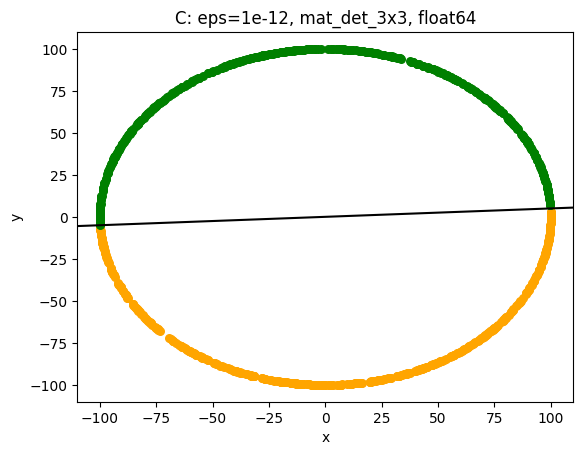

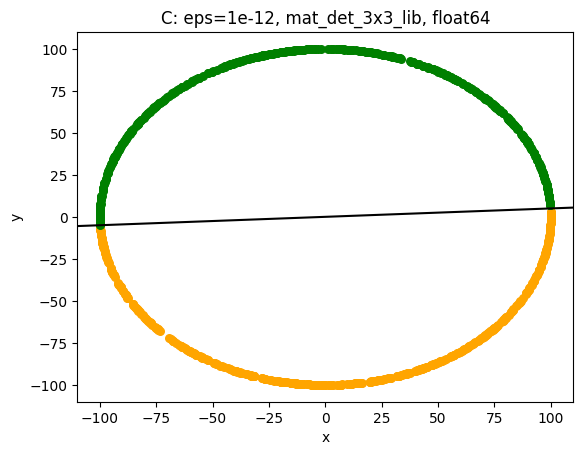

In [28]:
mat_det_functions = [mat_det_2x2, mat_det_2x2_lib, mat_det_3x3, mat_det_3x3_lib]
epsilon = 10 ** -12
points = points_c

for mat_det_function in mat_det_functions:
    classified_points = categorize_points(points, a, b, mat_det_function, epsilon)
    title = f"C: eps={str(epsilon)}, {mat_det_function.__name__}, float64"
    draw_line(classified_points[0], classified_points[1], classified_points[2], title)
    
    print(title)
    print(f"c_eps_{str(epsilon)}_{mat_det_function.__name__}_float64")
    print(f"points classified as left: {len(classified_points[0])}")
    print(f"points classified as mid: {len(classified_points[1])}")
    print(f"points classified as right: {len(classified_points[2])}")
    print()


D: eps=1e-12, mat_det_2x2, float64
d_eps_1e-12_mat_det_2x2_float64
points classified as left: 81
points classified as mid: 841
points classified as right: 78

D: eps=1e-12, mat_det_2x2_lib, float64
d_eps_1e-12_mat_det_2x2_lib_float64
points classified as left: 106
points classified as mid: 795
points classified as right: 99

D: eps=1e-12, mat_det_3x3, float64
d_eps_1e-12_mat_det_3x3_float64
points classified as left: 0
points classified as mid: 1000
points classified as right: 0

D: eps=1e-12, mat_det_3x3_lib, float64
d_eps_1e-12_mat_det_3x3_lib_float64
points classified as left: 0
points classified as mid: 1000
points classified as right: 0



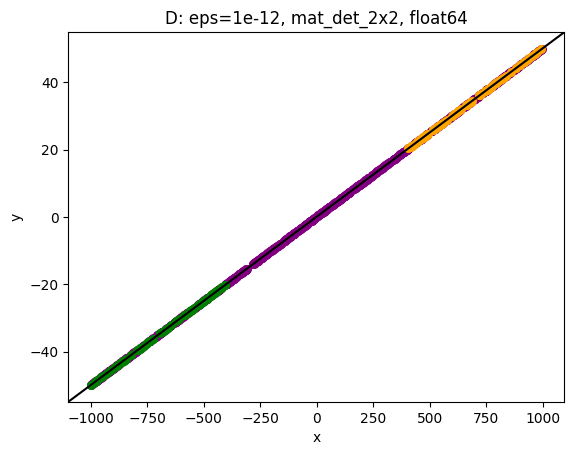

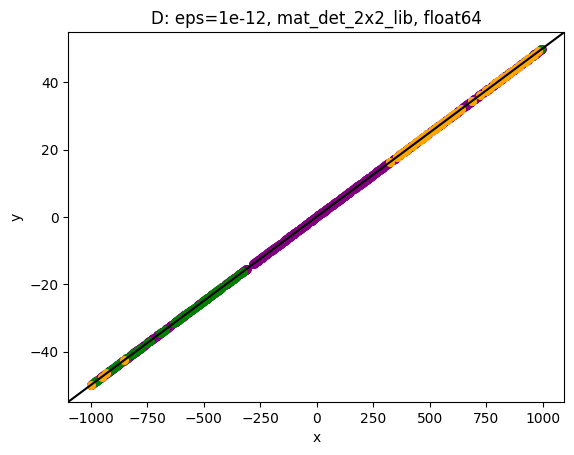

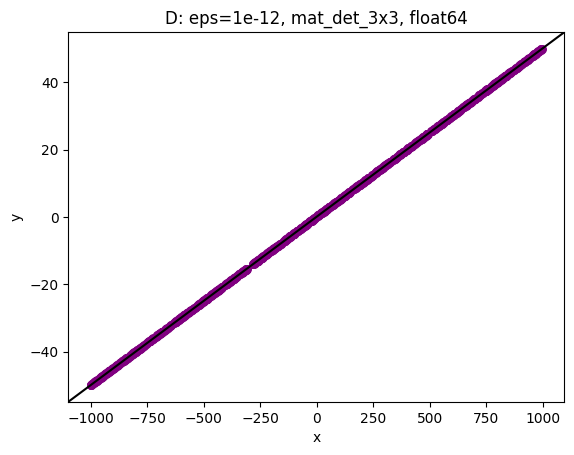

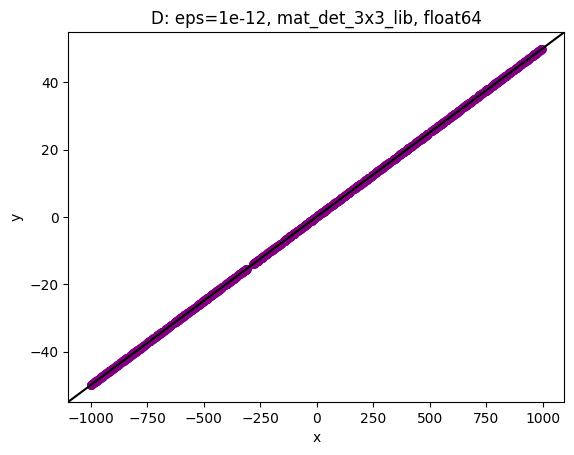

In [29]:
mat_det_functions = [mat_det_2x2, mat_det_2x2_lib, mat_det_3x3, mat_det_3x3_lib]
epsilon = 10 ** -12
points = points_d

for mat_det_function in mat_det_functions:
    classified_points = categorize_points(points, a, b, mat_det_function, epsilon)
    title = f"D: eps={str(epsilon)}, {mat_det_function.__name__}, float64"
    draw_line(classified_points[0], classified_points[1], classified_points[2], title)
    
    print(title)
    print(f"d_eps_{str(epsilon)}_{mat_det_function.__name__}_float64")
    print(f"points classified as left: {len(classified_points[0])}")
    print(f"points classified as mid: {len(classified_points[1])}")
    print(f"points classified as right: {len(classified_points[2])}")
    print()

Przeprowadźmy teraz testy dla mniejszej precyzji obliczeń. Do tego celu należy zmiejszyć typ danych z float64 (domyślny typ floata w pythonie) na float32. Różnią się one tym, że float32 jest zapisywane na mniejszej ilości bitów, co przekłada się no mniejszą ilosć cyfr po przecinku.
Zamienić typ floata w całej tablicy można zrobić w następujący sposób:

In [30]:
points_a_float32 = np.float32(points_a)
points_b_float32 = np.float32(points_b)
points_c_float32 = np.float32(points_c)
points_d_float32 = np.float32(points_d)

A: eps=1e-12, mat_det_2x2, float32
a_eps_1e-12_mat_det_2x2_float32
points classified as left: 50187
points classified as mid: 0
points classified as right: 49813

A: eps=1e-12, mat_det_2x2_lib, float32
a_eps_1e-12_mat_det_2x2_lib_float32
points classified as left: 50187
points classified as mid: 0
points classified as right: 49813

A: eps=1e-12, mat_det_3x3, float32
a_eps_1e-12_mat_det_3x3_float32
points classified as left: 50187
points classified as mid: 0
points classified as right: 49813

A: eps=1e-12, mat_det_3x3_lib, float32
a_eps_1e-12_mat_det_3x3_lib_float32
points classified as left: 50187
points classified as mid: 0
points classified as right: 49813



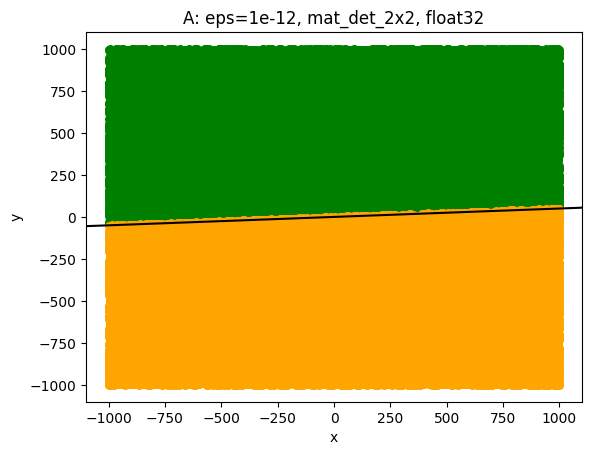

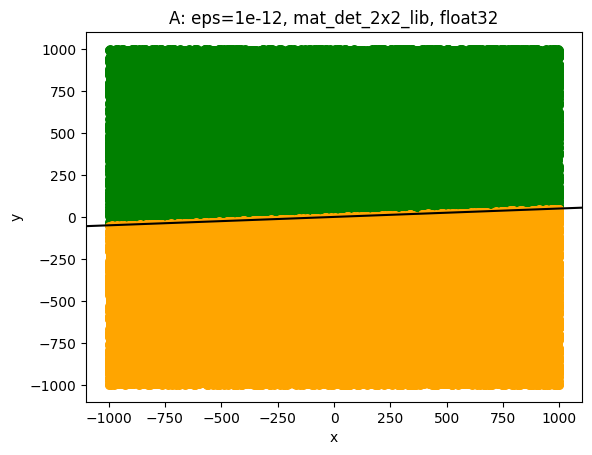

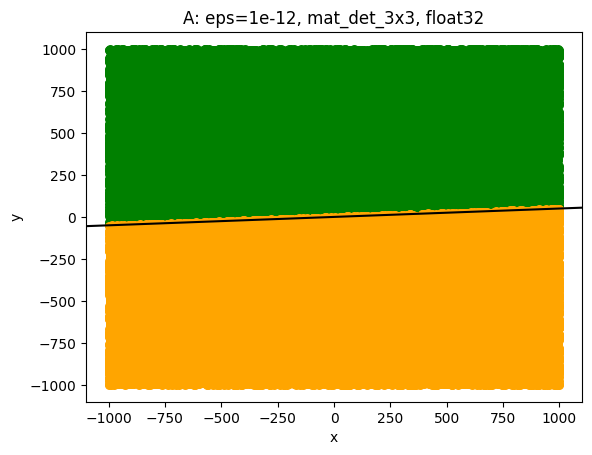

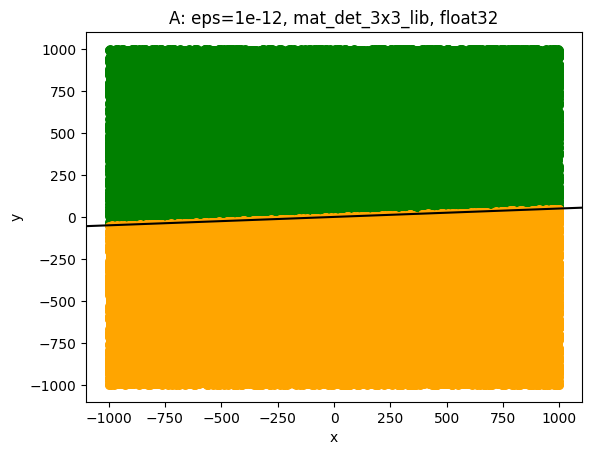

In [31]:
mat_det_functions = [mat_det_2x2, mat_det_2x2_lib, mat_det_3x3, mat_det_3x3_lib]
epsilon = 10 ** -12

for mat_det_function in mat_det_functions:
    classified_points = categorize_points(points_a_float32, a, b, mat_det_function, epsilon, float32=True)
    title = f"A: eps={str(epsilon)}, {mat_det_function.__name__}, float32"
    draw_line(classified_points[0], classified_points[1], classified_points[2], title)
    print(title)
    print(f"a_eps_{str(epsilon)}_{mat_det_function.__name__}_float32")
    print(f"points classified as left: {len(classified_points[0])}")
    print(f"points classified as mid: {len(classified_points[1])}")
    print(f"points classified as right: {len(classified_points[2])}")
    print()


B: eps=1e-12, mat_det_2x2, float32
b_eps_1e-12_mat_det_2x2_float32
points classified as left: 0
points classified as mid: 100000
points classified as right: 0

B: eps=1e-12, mat_det_2x2_lib, float32
b_eps_1e-12_mat_det_2x2_lib_float32
points classified as left: 6756
points classified as mid: 86543
points classified as right: 6701

B: eps=1e-12, mat_det_3x3, float32
b_eps_1e-12_mat_det_3x3_float32
points classified as left: 50110
points classified as mid: 0
points classified as right: 49890

B: eps=1e-12, mat_det_3x3_lib, float32
b_eps_1e-12_mat_det_3x3_lib_float32
points classified as left: 50110
points classified as mid: 0
points classified as right: 49890



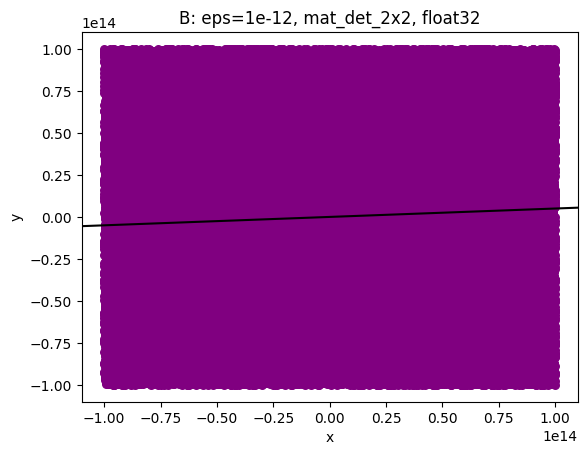

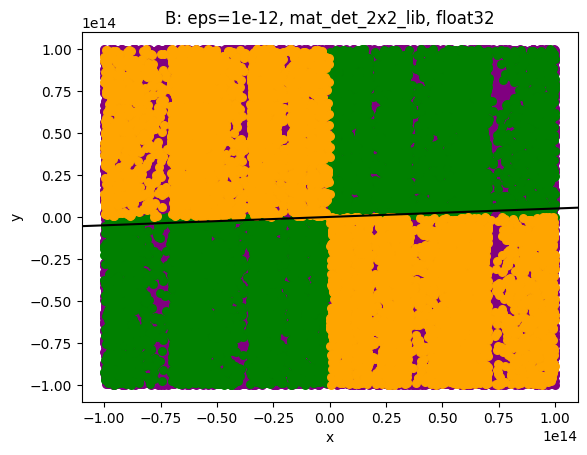

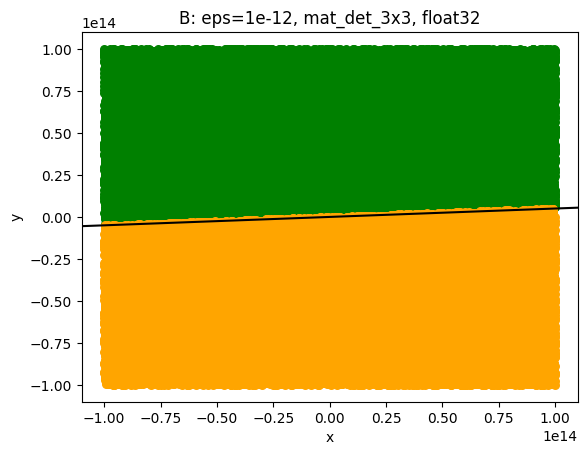

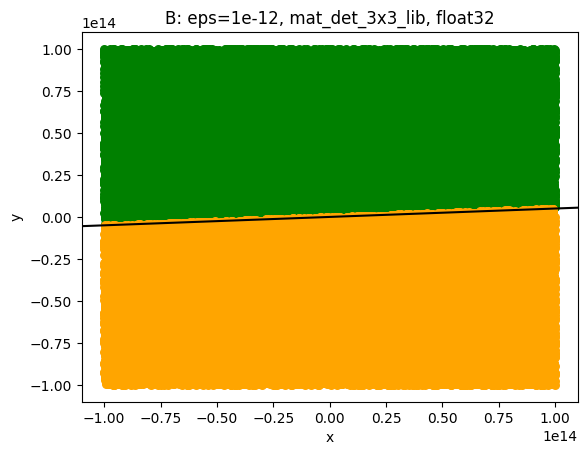

In [32]:
mat_det_functions = [mat_det_2x2, mat_det_2x2_lib, mat_det_3x3, mat_det_3x3_lib]
epsilon = 10 ** -12
points = points_b_float32

for mat_det_function in mat_det_functions:
    classified_points = categorize_points(points, a, b, mat_det_function, epsilon, float32=True)
    title = f"B: eps={str(epsilon)}, {mat_det_function.__name__}, float32"
    draw_line(classified_points[0], classified_points[1], classified_points[2], title)
    print(title)
    print(f"b_eps_{str(epsilon)}_{mat_det_function.__name__}_float32")
    print(f"points classified as left: {len(classified_points[0])}")
    print(f"points classified as mid: {len(classified_points[1])}")
    print(f"points classified as right: {len(classified_points[2])}")
    print()


C: eps=1e-12, mat_det_2x2, float32
c_eps_1e-12_mat_det_2x2_float32
points classified as left: 498
points classified as mid: 0
points classified as right: 502

C: eps=1e-12, mat_det_2x2_lib, float32
c_eps_1e-12_mat_det_2x2_lib_float32
points classified as left: 498
points classified as mid: 0
points classified as right: 502

C: eps=1e-12, mat_det_3x3, float32
c_eps_1e-12_mat_det_3x3_float32
points classified as left: 498
points classified as mid: 0
points classified as right: 502

C: eps=1e-12, mat_det_3x3_lib, float32
c_eps_1e-12_mat_det_3x3_lib_float32
points classified as left: 498
points classified as mid: 0
points classified as right: 502



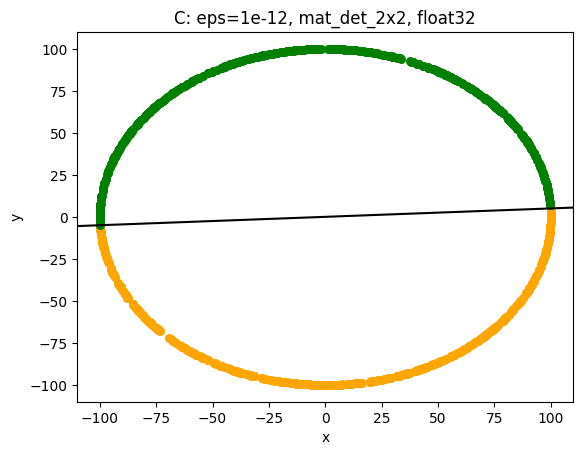

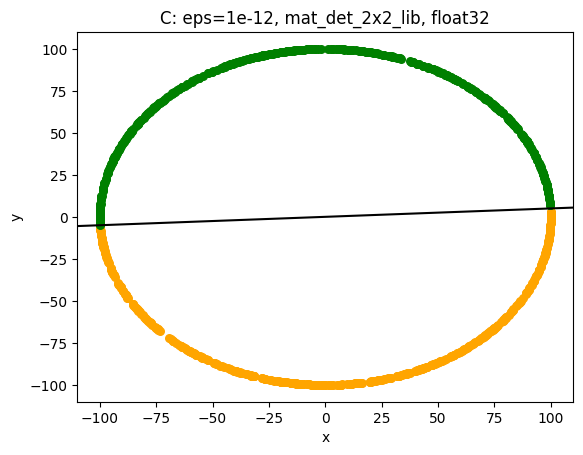

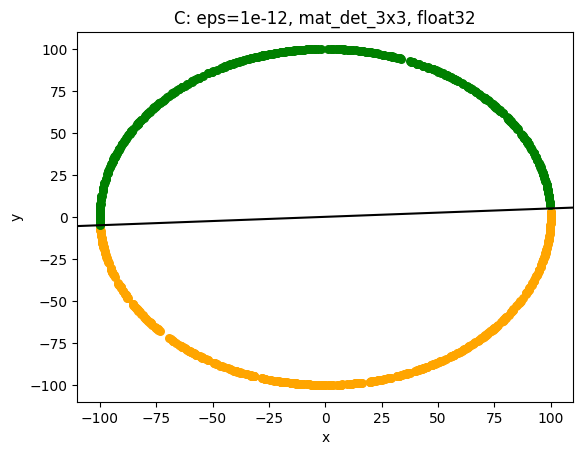

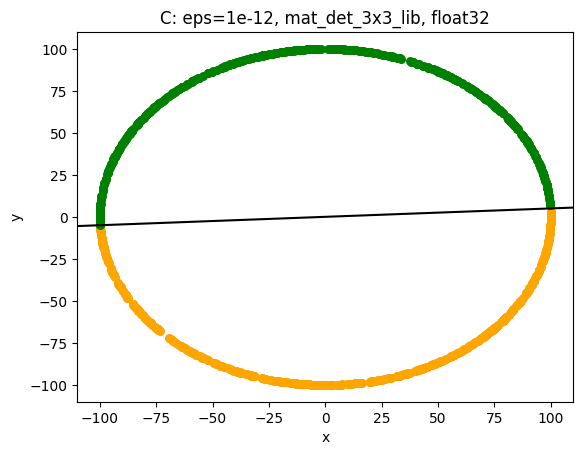

In [33]:
mat_det_functions = [mat_det_2x2, mat_det_2x2_lib, mat_det_3x3, mat_det_3x3_lib]
epsilon = 10 ** -12
points = points_c_float32

for mat_det_function in mat_det_functions:
    classified_points = categorize_points(points, a, b, mat_det_function, epsilon, float32=True)
    title = f"C: eps={str(epsilon)}, {mat_det_function.__name__}, float32"
    draw_line(classified_points[0], classified_points[1], classified_points[2], title)    
    
    print(title)
    print(f"c_eps_{str(epsilon)}_{mat_det_function.__name__}_float32")
    print(f"points classified as left: {len(classified_points[0])}")
    print(f"points classified as mid: {len(classified_points[1])}")
    print(f"points classified as right: {len(classified_points[2])}")
    print()

D: eps=1e-12, mat_det_2x2, float32
d_eps_1e-12_mat_det_2x2_float32
points classified as left: 164
points classified as mid: 663
points classified as right: 173

D: eps=1e-12, mat_det_2x2_lib, float32
d_eps_1e-12_mat_det_2x2_lib_float32
points classified as left: 511
points classified as mid: 0
points classified as right: 489

D: eps=1e-12, mat_det_3x3, float32
d_eps_1e-12_mat_det_3x3_float32
points classified as left: 328
points classified as mid: 411
points classified as right: 261

D: eps=1e-12, mat_det_3x3_lib, float32
d_eps_1e-12_mat_det_3x3_lib_float32
points classified as left: 421
points classified as mid: 193
points classified as right: 386



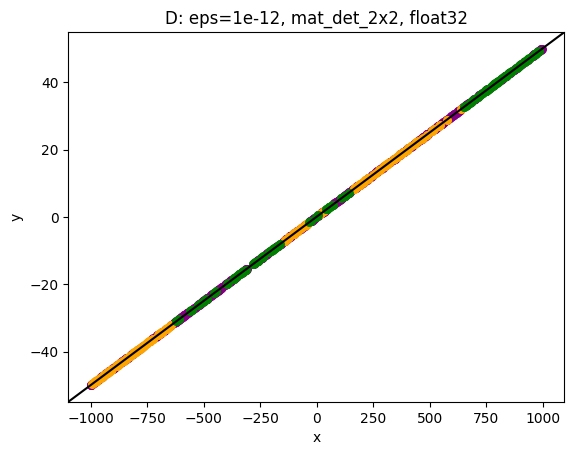

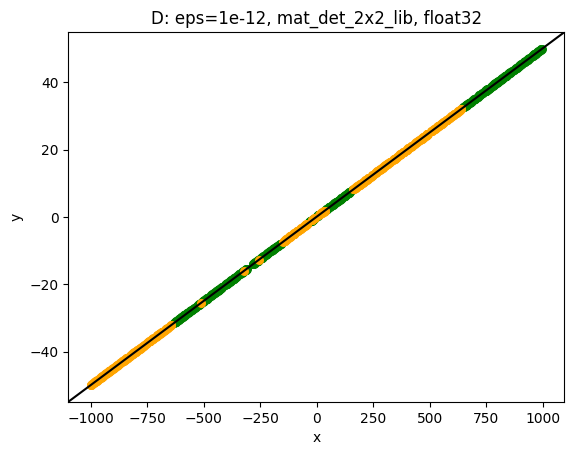

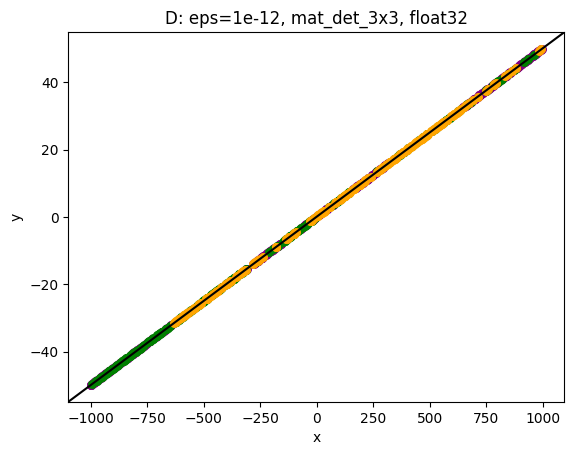

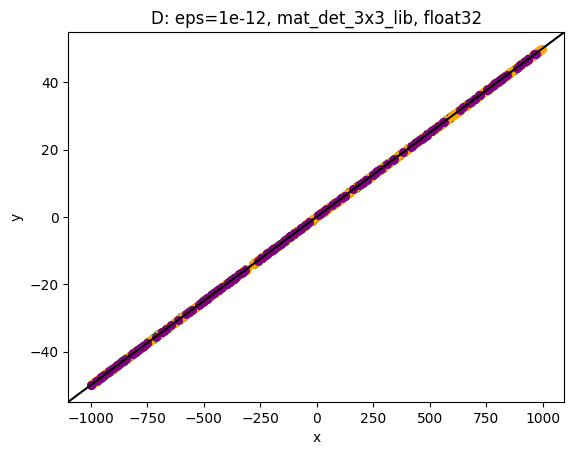

In [34]:
mat_det_functions = [mat_det_2x2, mat_det_2x2_lib, mat_det_3x3, mat_det_3x3_lib]
epsilon = 10 ** -12
points = points_d_float32

for mat_det_function in mat_det_functions:
        classified_points = categorize_points(points, a, b, mat_det_function, epsilon)
        title = f"D: eps={str(epsilon)}, {mat_det_function.__name__}, float32"
        draw_line(classified_points[0], classified_points[1], classified_points[2], title)

        print(title)
        print(f"d_eps_{str(epsilon)}_{mat_det_function.__name__}_float32")
        print(f"points classified as left: {len(classified_points[0])}")
        print(f"points classified as mid: {len(classified_points[1])}")
        print(f"points classified as right: {len(classified_points[2])}")
        print()

In [35]:
point_sets_list = [points_a, points_b, points_c, points_d, points_a_float32, points_b_float32, points_c_float32, points_d_float32]
type = ['A', 'B', 'C', 'D', 'A_float32', 'B_float32', 'C_float32', 'D_float32']

results_df = pd.DataFrame(columns=['Set', 'Epsilon', 'Function', 'Left', 'Mid', 'Right'])
epsilon = 10 ** -12

for i in range(len(point_sets_list)):
    for j in range(len(mat_det_functions)):
        left, mid, right = categorize_points(point_sets_list[i], a, b, mat_det_functions[j], epsilon)
        results_df.loc[len(results_df)] = {
            'Set': type[i],
            'Epsilon': epsilon,
            'Function': mat_det_functions[j].__name__,
            'Left': len(left),
            'Mid': len(mid),
            'Right': len(right),
        }

results_df.to_csv('categorization_eps_' + str(epsilon) + '.csv', index=False)

In [36]:
point_sets_list = [points_a, points_b, points_c, points_d, points_a_float32, points_b_float32, points_c_float32, points_d_float32]
type = ['A', 'B', 'C', 'D', 'A_float32', 'B_float32', 'C_float32', 'D_float32']

results_df = pd.DataFrame(columns=['Set', 'Epsilon', 'Function', 'Left', 'Mid', 'Right'])
epsilons = [0, 10 ** -12, 10 ** -10, 10 ** - 8, 10 ** -6]

for i in range(len(point_sets_list)):
    for j in range(len(mat_det_functions)):
        for epsilon in epsilons:
            left, mid, right = categorize_points(point_sets_list[i], a, b, mat_det_functions[j], epsilon)
            results_df.loc[len(results_df)] = {
                'Set': type[i],
                'Epsilon': epsilon,
                'Function': mat_det_functions[j].__name__,
                'Left': len(left),
                'Mid': len(mid),
                'Right': len(right),
            }

results_df.to_csv('categorization_all_eps' + '.csv', index=False)

Porównaj wyniki klasyfikacji dla współrzędnych punktów o zmiejszonej precyzji floata

## Opisz swoje wnioski na podstawie przeprowadzonych własnoręcznie testów.


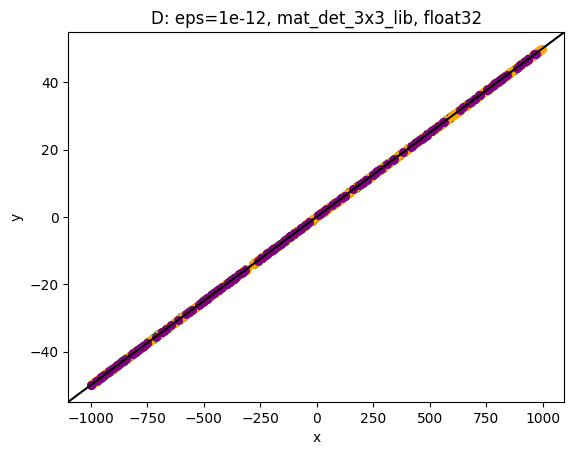

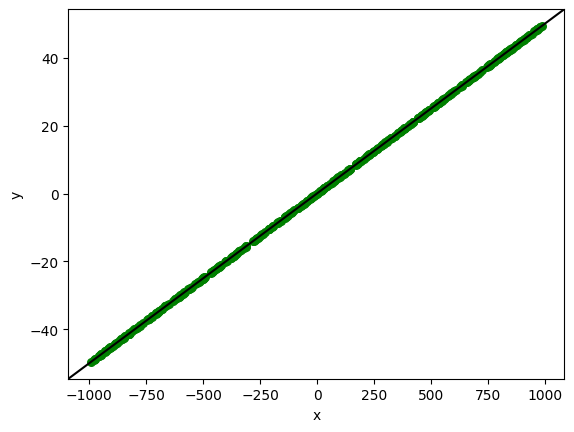

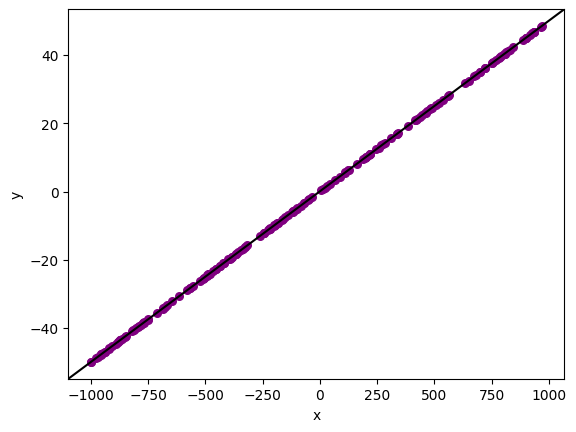

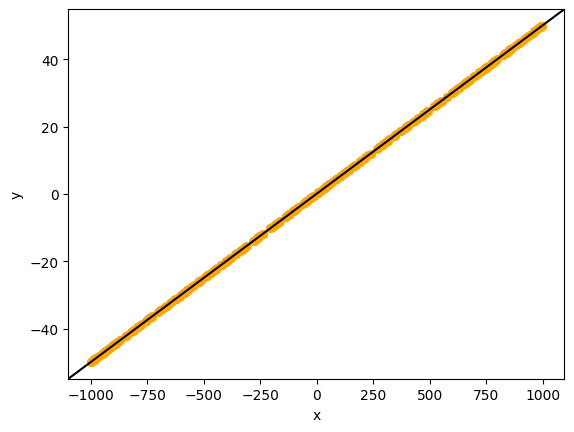

In [37]:
# generowanie innych wykresów
mat_det_function = mat_det_3x3_lib
points = points_d_float32
epsilon = 10 ** -12

classified_points = categorize_points(points, a, b, mat_det_function, epsilon)
title = f"D: eps={str(epsilon)}, {mat_det_function.__name__}, float32"
draw_line(classified_points[0], classified_points[1], classified_points[2], title)
draw_line(classified_points[0], [], [], "")
draw_line([], classified_points[1], [], "")
draw_line([], [], classified_points[2], "")


In [38]:
# porównanie czasu działania różnych implementacji obliczania wyznacznika dla zbioru 10^6 punktów 
# z przedziału [-1000, 1000]
import time

set_sizes = [10**2, 10**3, 10**4, 10**5, 10**6, 10**7]
mat_det_functions = [mat_det_2x2, mat_det_2x2_lib, mat_det_3x3, mat_det_3x3_lib]
epsilon = 10 ** -12

for set_size in set_sizes:
    print(set_size)
    test_points = generate_uniform_points(-1000, 1000, set_size)
    for mat_det_function in mat_det_functions:
        start = time.time()
        classified_points = categorize_points(test_points, a, b, mat_det_function, epsilon)
        end = time.time()
        print("czas działania dla funkcji %s: %.4fs" % (mat_det_function.__name__, end - start))
    print()


100
czas działania dla funkcji mat_det_2x2: 0.0004s
czas działania dla funkcji mat_det_2x2_lib: 0.0015s
czas działania dla funkcji mat_det_3x3: 0.0002s
czas działania dla funkcji mat_det_3x3_lib: 0.0016s

1000
czas działania dla funkcji mat_det_2x2: 0.0008s
czas działania dla funkcji mat_det_2x2_lib: 0.0052s
czas działania dla funkcji mat_det_3x3: 0.0008s
czas działania dla funkcji mat_det_3x3_lib: 0.0059s

10000
czas działania dla funkcji mat_det_2x2: 0.0071s
czas działania dla funkcji mat_det_2x2_lib: 0.0524s
czas działania dla funkcji mat_det_3x3: 0.0073s
czas działania dla funkcji mat_det_3x3_lib: 0.0540s

100000
czas działania dla funkcji mat_det_2x2: 0.0582s
czas działania dla funkcji mat_det_2x2_lib: 0.4720s
czas działania dla funkcji mat_det_3x3: 0.0662s
czas działania dla funkcji mat_det_3x3_lib: 0.5743s

1000000
czas działania dla funkcji mat_det_2x2: 0.6446s
czas działania dla funkcji mat_det_2x2_lib: 5.0315s
czas działania dla funkcji mat_det_3x3: 0.7133s
czas działania dla